#  Objekterkennung

## Objekt- und Personenerkennung auf den politischen Plakaten

In [ ]:
import os
from PIL import Image
import torch
from ultralytics import YOLO
import yaml
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import defaultdict
import itertools
import seaborn as sns

root_dir = '/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics'

In [14]:
# Das Model laden
model = YOLO("yolo11n.pt")

In [15]:
# Das Model mit dem Datensatz für 100 Epochen trainieren
train = model.train(data=os.path.join(root_dir, "config.yaml"), epochs=100, batch=16, imgsz=640, device='0', optimizer='AdamW', patience=10, dropout=0.2, weight_decay=0.0002, lr0=0.001, lrf=0.1)

Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/gdrive/MyDrive/Colab Notebooks/config.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/gdrive/MyDrive/Colab Notebooks/yolo/train/labels.cache... 804 images, 9 backgrounds, 0 corrupt: 100%|██████████| 813/813 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 75, len(boxes) = 2054. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gdrive/MyDrive/Colab Notebooks/yolo/validation/labels.cache... 108 images, 1 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0002), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.5G      1.906      4.261      1.987         70        640: 100%|██████████| 51/51 [00:25<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        109        331   0.000351      0.089     0.0018   0.000442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.89G      1.895          4      1.991         69        640: 100%|██████████| 51/51 [00:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        109        331      0.463     0.0325    0.00684    0.00219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.89G      1.917      3.853      2.015         76        640: 100%|██████████| 51/51 [00:20<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        109        331      0.408     0.0417    0.00647    0.00217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.89G      1.912      3.764      2.037         70        640: 100%|██████████| 51/51 [00:22<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        109        331      0.569     0.0508     0.0126    0.00403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.89G      1.879      3.613      2.018         65        640: 100%|██████████| 51/51 [00:21<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.33it/s]

                   all        109        331      0.569     0.0325     0.0227    0.00709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.89G      1.854      3.491      1.997         52        640: 100%|██████████| 51/51 [00:20<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        109        331     0.0191     0.0835     0.0214      0.008



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.89G      1.836      3.446      2.001         58        640: 100%|██████████| 51/51 [00:21<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        109        331       0.33     0.0813     0.0321     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.89G      1.807      3.338      1.981         58        640: 100%|██████████| 51/51 [00:21<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        109        331      0.296     0.0693     0.0367     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.89G      1.784      3.242      1.908         30        640: 100%|██████████| 51/51 [00:20<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


                   all        109        331      0.234     0.0604     0.0241    0.00882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.89G      1.747      3.191      1.907         65        640: 100%|██████████| 51/51 [00:22<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        109        331       0.21     0.0932     0.0536     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.89G      1.744      3.117      1.901         41        640: 100%|██████████| 51/51 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        109        331      0.238      0.118     0.0477     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.89G        1.7      3.051      1.876         79        640: 100%|██████████| 51/51 [00:20<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        109        331      0.246     0.0743     0.0461     0.0179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.9G      1.715      2.983       1.88         59        640: 100%|██████████| 51/51 [00:22<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        109        331      0.401      0.124     0.0504     0.0214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.9G      1.721      2.954      1.882         53        640: 100%|██████████| 51/51 [00:20<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


                   all        109        331      0.175     0.0939     0.0522     0.0205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.9G      1.708      2.855      1.866         34        640: 100%|██████████| 51/51 [00:19<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        109        331      0.242      0.144     0.0641     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.91G      1.669      2.789      1.842         57        640: 100%|██████████| 51/51 [00:21<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


                   all        109        331      0.195      0.129     0.0611     0.0222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.92G      1.635       2.76      1.821         59        640: 100%|██████████| 51/51 [00:20<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


                   all        109        331      0.367      0.134     0.0677     0.0214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.92G       1.65      2.728      1.823         64        640: 100%|██████████| 51/51 [00:20<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        109        331       0.17      0.113     0.0648     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.92G      1.626      2.634      1.794         57        640: 100%|██████████| 51/51 [00:21<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        109        331      0.254      0.117     0.0901     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.92G      1.571      2.553       1.75         62        640: 100%|██████████| 51/51 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        109        331      0.213      0.155     0.0928     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.92G      1.581      2.528      1.751         52        640: 100%|██████████| 51/51 [00:21<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        109        331      0.219      0.117     0.0791     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.92G      1.566       2.47      1.757         73        640: 100%|██████████| 51/51 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


                   all        109        331      0.253      0.141     0.0938     0.0325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.92G      1.576      2.433      1.745         74        640: 100%|██████████| 51/51 [00:19<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        109        331      0.364        0.1     0.0817     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.92G      1.526      2.409      1.716         35        640: 100%|██████████| 51/51 [00:21<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        109        331      0.216      0.124     0.0841     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.92G      1.543      2.365      1.719         76        640: 100%|██████████| 51/51 [00:19<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        109        331      0.276      0.148      0.103     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.92G      1.549      2.334      1.742         78        640: 100%|██████████| 51/51 [00:20<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


                   all        109        331      0.402       0.12     0.0868     0.0368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.92G      1.476      2.256      1.688         49        640: 100%|██████████| 51/51 [00:20<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        109        331      0.164      0.117     0.0765     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.92G      1.517      2.184      1.697         49        640: 100%|██████████| 51/51 [00:19<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


                   all        109        331      0.106      0.177     0.0953     0.0445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.92G      1.497      2.107      1.663         63        640: 100%|██████████| 51/51 [00:21<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        109        331      0.223      0.126     0.0826     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.92G      1.471       2.09      1.652         42        640: 100%|██████████| 51/51 [00:19<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        109        331      0.204      0.142     0.0937     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.92G      1.452      2.059      1.648         57        640: 100%|██████████| 51/51 [00:20<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        109        331      0.329      0.125     0.0896      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.92G      1.433      2.014      1.632         56        640: 100%|██████████| 51/51 [00:19<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        109        331      0.326     0.0862      0.103     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.92G      1.408       1.93      1.608         49        640: 100%|██████████| 51/51 [00:19<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        109        331      0.223      0.116      0.113     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.94G      1.415      1.906      1.603         74        640: 100%|██████████| 51/51 [00:21<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


                   all        109        331      0.285      0.104      0.108     0.0487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.94G      1.419      1.872        1.6         42        640: 100%|██████████| 51/51 [00:20<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        109        331      0.191      0.144     0.0973     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.94G      1.386      1.838      1.578         37        640: 100%|██████████| 51/51 [00:20<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        109        331      0.167       0.14     0.0922     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.94G      1.366      1.828      1.564         74        640: 100%|██████████| 51/51 [00:21<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        109        331      0.353      0.131      0.117     0.0454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.94G      1.393      1.834      1.591         61        640: 100%|██████████| 51/51 [00:19<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        109        331      0.276      0.139      0.109     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.94G       1.34       1.73      1.544         47        640: 100%|██████████| 51/51 [00:21<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        109        331       0.27      0.163     0.0984     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.94G      1.331      1.719      1.537         54        640: 100%|██████████| 51/51 [00:19<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]


                   all        109        331      0.421        0.1      0.108     0.0438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.94G      1.335      1.697      1.556         48        640: 100%|██████████| 51/51 [00:20<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        109        331      0.284      0.144      0.103     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.94G      1.309      1.698      1.519         51        640: 100%|██████████| 51/51 [00:20<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        109        331      0.443      0.138      0.131     0.0571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.94G      1.306      1.632      1.511         56        640: 100%|██████████| 51/51 [00:19<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        109        331      0.303      0.139      0.118     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.94G      1.301      1.626      1.513         46        640: 100%|██████████| 51/51 [00:20<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        109        331      0.329      0.109        0.1     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.94G      1.294      1.573      1.506         47        640: 100%|██████████| 51/51 [00:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        109        331      0.249      0.152      0.107     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.94G      1.254      1.527      1.467         58        640: 100%|██████████| 51/51 [00:21<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        109        331      0.371      0.144      0.149     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.94G      1.251      1.504      1.475         69        640: 100%|██████████| 51/51 [00:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        109        331      0.258      0.144      0.116     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.94G       1.27      1.536      1.503         48        640: 100%|██████████| 51/51 [00:19<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        109        331      0.153      0.204      0.133     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.95G      1.218      1.437      1.445         64        640: 100%|██████████| 51/51 [00:18<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        109        331       0.47      0.139      0.152     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.95G      1.236      1.461      1.468         47        640: 100%|██████████| 51/51 [00:19<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        109        331      0.338      0.115      0.118       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.95G      1.209      1.424       1.45         58        640: 100%|██████████| 51/51 [00:19<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        109        331      0.194      0.147      0.112     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.95G      1.201      1.431      1.439         53        640: 100%|██████████| 51/51 [00:19<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        109        331      0.315      0.125      0.119     0.0508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.95G      1.217        1.4      1.434         50        640: 100%|██████████| 51/51 [00:20<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        109        331      0.302      0.142      0.123     0.0525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.95G       1.17      1.368      1.398         58        640: 100%|██████████| 51/51 [00:18<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        109        331      0.411       0.11      0.136      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.95G      1.203      1.382       1.44         56        640: 100%|██████████| 51/51 [00:20<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        109        331      0.197      0.147      0.113      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.95G      1.153      1.305      1.403         75        640: 100%|██████████| 51/51 [00:19<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        109        331      0.365      0.113      0.102     0.0436
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 46, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



56 epochs completed in 0.365 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,586,442 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all        109        331      0.371      0.144      0.149     0.0656
 agricultural labourer         25         27      0.391      0.704      0.453      0.177
                  book          5          7          1      0.413      0.521      0.292
              building         10         14      0.192     0.0714     0.0409     0.0243
                 crane         13         21      0.201     0.0952     0.0703      0.033
        factory worker         29         33       0.27      0.333      0.296      0.129
                  flag         16         19     0.0611      0.105     0.0428     0.0126
                flower         10         23          1          0    0.00634    0.00345
                 grass          7         13      0.418     0.0769     0.0413     0.0234
                hammer         15         15      0.431        0.2      0.295      0.117
             headscarf         13         14       0.31      0.162      0.267     0.0561
                 hors

In [52]:
def save_detections_to_csv(results, output_csv):
  rows = []
  image_counter = 1

  for result in results:
    image_filename = result.path
    boxes = result.boxes  # Boxes object for bounding box outputs
    boxes_str = ""

    for detection in boxes:
      class_id = int(detection.cls)
      class_name = result.names[class_id]
      boxes_str += f"{class_name}, "

    boxes_str = boxes_str.rstrip(", ")

    rows.append([image_filename, f"Bild {image_counter}", boxes_str])
    image_counter += 1

    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
#   result.show()  # display to screen

  with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(["Dateiname", "Bild",  "Erkannte Objekte"])
    csv_writer.writerows(rows)

  print(f"CSV-Datei '{output_csv}' wurde erfolgreich erstellt.")

In [53]:
def detect_class_correlations(csv_file):
    df = pd.read_csv(csv_file)

    class_counts = defaultdict(lambda: defaultdict(int))

    for index, row in df.iterrows():
        detected_classes = row["Erkannte Objekte"]

        if isinstance(detected_classes, str) and detected_classes.strip():
            detected_classes = detected_classes.split(", ")
        else:
            detected_classes = []
            continue

        for cls1, cls2 in itertools.combinations(detected_classes, 2):
            class_counts[cls1][cls2] += 1
            class_counts[cls2][cls1] += 1

    correlation_matrix = pd.DataFrame(class_counts).fillna(0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", cbar=True)
    plt.title("Korrelationen zwischen Objekten")
    plt.xlabel("Erkannte Objekte")
    plt.ylabel("Erkannte Objekte")
    plt.show()

    return correlation_matrix

In [ ]:
trained_model = YOLO("/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/runs/detect/train/weights/best.pt")
results = model("/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/yolo/test/USSR", save=True, stream=True)

save_detections_to_csv(results, "/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/yolo/detections_USSR.csv")


image 1/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/10th_five_year_plan.jpg: 640x640 1 flag, 13.9ms
image 2/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/11th_vertov.jpg: 640x640 1 factory worker, 10.0ms
image 3/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/15th_anniversary.jpg: 640x640 (no detections), 10.1ms
image 4/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/1980_olympic_games.jpg: 640x640 1 military, 10.3ms
image 5/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/27th_kpss.jpg: 640x640 (no detections), 10.6ms
image 6/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/2plus2equals5.jpg: 640x640 1 flag, 1 military, 1 weapon, 10.0ms
image 7/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/2x2_vodka.jpg: 640x640 (no detections), 10.0ms
image 8/932 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/USSR/6th_festival.jpg: 640x640 1 building, 1 weapon, 9.9ms
image 9/932 /content/gdrive/MyDrive/Colab Notebo

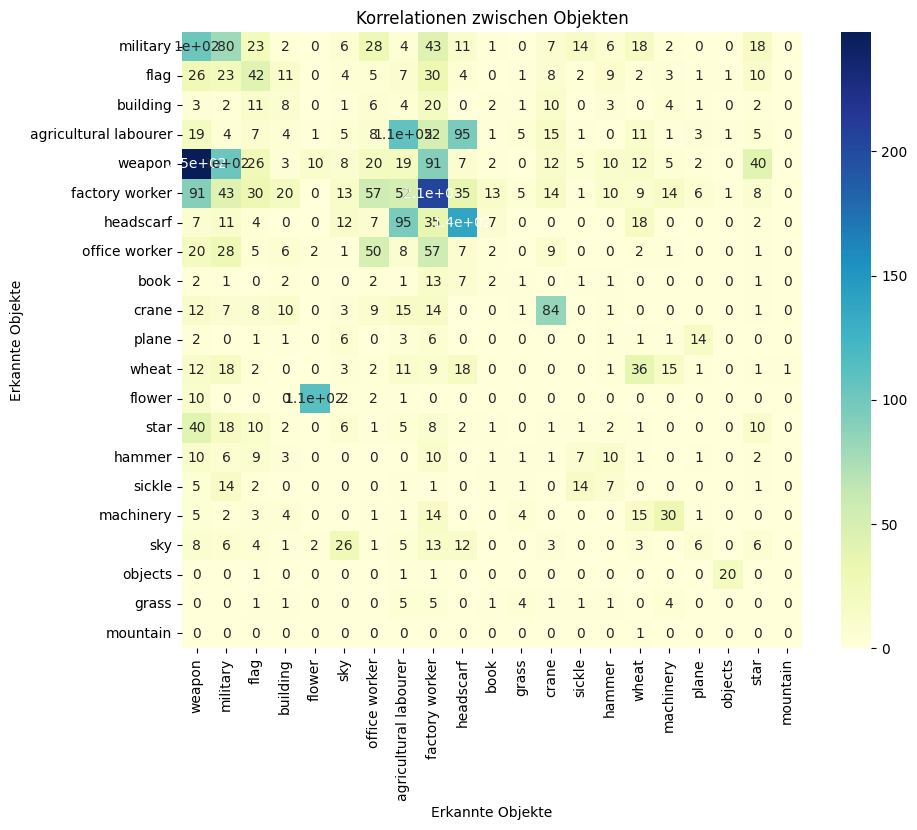

In [ ]:
csv_file_USSR = "/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/yolo/detections_USSR.csv"
correlation_matrix_USSR = detect_class_correlations(csv_file_USSR)

In [ ]:
results_1 = model("/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/yolo/test/DPRK", save=True, stream=True)

save_detections_to_csv(results_1, "/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/yolo/detections_DPRK.csv")


image 1/1048 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/DPRK/00391e8e7b7471184a7376a0880c0ad8.jpg: 640x640 3 agricultural labourers, 1 headscarf, 12.6ms
image 2/1048 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/DPRK/003da6283a7077621b9eb8cf0b9f7d4e.jpg: 640x640 1 agricultural labourer, 1 factory worker, 11.3ms
image 3/1048 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/DPRK/009d864f387b66353483e09c8c501adb.jpg: 640x640 (no detections), 10.4ms
image 4/1048 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/DPRK/00cba28b05cb6808c17ede19318540b7.jpg: 640x640 3 factory workers, 10.3ms
image 5/1048 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/DPRK/00e13a977a65cd849b578a901cf44053.jpg: 640x640 3 agricultural labourers, 10.1ms
image 6/1048 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/DPRK/01292c1dcc2a9a4fb485ad0ccec0978e.jpg: 640x640 1 agricultural labourer, 1 headscarf, 10.7ms
image 7/1048 /content/gdrive/MyDrive/Colab Notebooks/yolo/test/DPRK/01c3c1ec7f205613eb6da6b

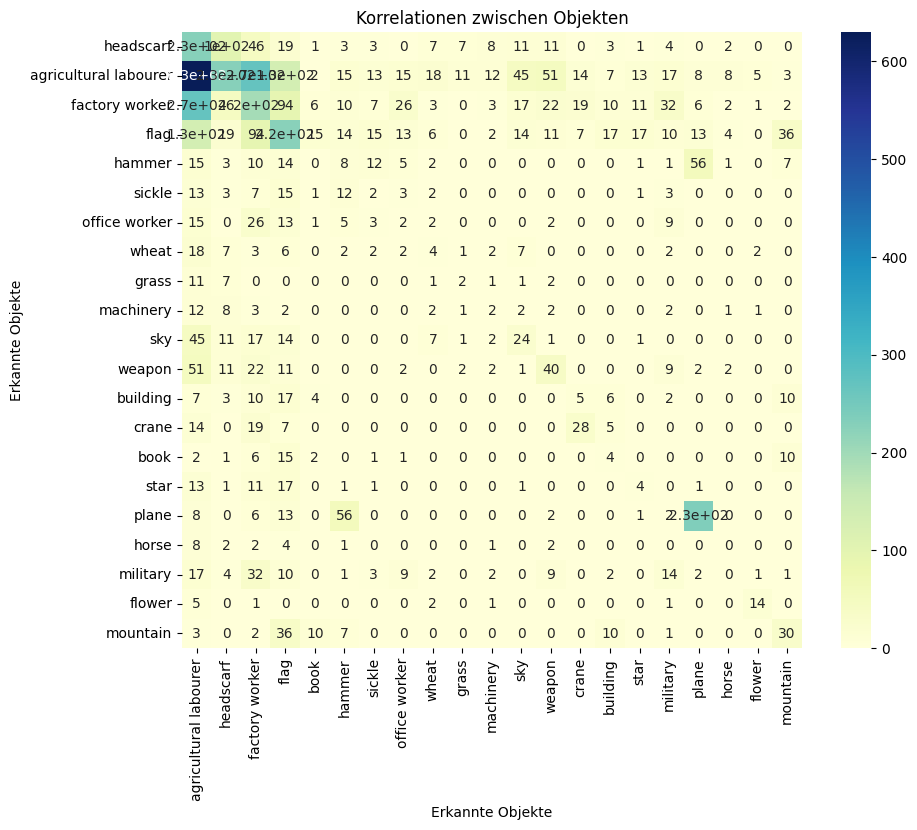

In [ ]:
csv_file_DPRK = "/home/sc.uni-leipzig.de/lj25vapa/Cultural Analytics/yolo/detections_DPRK.csv"
correlation_matrix_USSR = detect_class_correlations(csv_file_DPRK )

In [ ]:
# @software{yolo11_ultralytics,
#  author = {Glenn Jocher and Jing Qiu},
#  title = {Ultralytics YOLO11},
#  version = {11.0.0},
#  year = {2024},
#  url = {https://github.com/ultralytics/ultralytics},
#  orcid = {0000-0001-5950-6979, 0000-0002-7603-6750, 0000-0003-3783-7069},
#  license = {AGPL-3.0}
#}